# Faza 1

In [116]:
import pandas as pd

dt = pd.read_csv('dataset/electric_vehicles_spec_2025.csv')

dt.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


-------------------------------------------------------------------------------------------


# Definimi i tipeve të dhënave

In [117]:
print("Rreshta:", dt.shape[0])
print("Kolona:", dt.shape[1])

categorycolumns = dt.select_dtypes(include=['object']).columns
numericcolumns = dt.select_dtypes(include=['int32', 'int64', 'float64']).columns
print("Variablat kategorike", categorycolumns)
print("Variablat numerike", numericcolumns)


Rreshta: 478
Kolona: 22
Variablat kategorike Index(['brand', 'model', 'battery_type', 'fast_charge_port', 'cargo_volume_l',
       'drivetrain', 'segment', 'car_body_type', 'source_url'],
      dtype='object')
Variablat numerike Index(['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm'],
      dtype='object')


   -----------------------------------------------------------------------------------------------------
   

# Kualiteti i të dhënave

In [118]:
dt = dt.drop(columns=[
    'number_of_cells', 'length_mm', 'width_mm', 'height_mm', 'source_url'
], errors='ignore')

dt.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,car_body_type
0,Abarth,500e Convertible,155,37.8,Lithium-ion,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,Hatchback
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,Hatchback
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,SUV
3,Abarth,600e Turismo,200,50.8,Lithium-ion,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,SUV
4,Aiways,U5,150,60.0,Lithium-ion,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,SUV


---------------------------------------------------------------------------------------------------------------------

# Identifikimi i vlerave te zbrazëta

In [119]:
print("Kolonat me vlera te zbrazeta:", dt.columns[dt.isnull().any()].tolist())
print("Numri i rreshtave me vlera te zbrazeta:", dt.isnull().any(axis=1).sum())
print("Indekset me të dhëna që mungojnë:", dt.isnull().any(axis=1).to_numpy().nonzero()[0].tolist())

dt["battery_capacity_kWh"].fillna(dt["battery_capacity_kWh"].mean(), inplace=True)
dt["range_km"].fillna(dt["range_km"].median(), inplace=True)

dt["drivetrain"].fillna(dt["drivetrain"].mode()[0], inplace=True)
dt["car_body_type"].fillna(dt["car_body_type"].mode()[0], inplace=True)

print("\nPas trajtimit, numri total i vlerave te zbrazeta:", dt.isnull().sum().sum())



Kolonat me vlera te zbrazeta: ['model', 'torque_nm', 'fast_charging_power_kw_dc', 'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l']
Numri i rreshtave me vlera te zbrazeta: 36
Indekset me të dhëna që mungojnë: [4, 5, 61, 100, 101, 102, 128, 139, 148, 149, 168, 169, 170, 171, 184, 195, 196, 198, 199, 210, 211, 281, 284, 304, 307, 308, 310, 356, 364, 377, 378, 401, 402, 403, 404, 477]

Pas trajtimit, numri total i vlerave te zbrazeta: 37


---------------------------------------------------------------------------------------------------------------------

# Vlerat NaN(Not a number)

In [120]:
nan_rows = dt[dt.isna().any(axis=1)]

print("Objektet qe posedojne vlera NaN")
nan_rows.head()

Objektet qe posedojne vlera NaN


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,car_body_type
4,Aiways,U5,150,60.0,Lithium-ion,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,SUV
5,Aiways,U6,160,60.0,Lithium-ion,315.0,150,350,7.0,78.0,CCS,NaN,472,5,FWD,JC - Medium,SUV
61,BYD,DOLPHIN 44.9 kWh Boost,160,44.9,Lithium-ion,NaN,145,260,8.0,50.0,CCS,0.0,345,5,FWD,C - Medium,Hatchback
100,Dongfeng,Box 31.4 kWh,140,29.0,Lithium-ion,160.0,126,190,12.5,50.0,CCS,NaN,326,5,FWD,B - Compact,Hatchback
101,Dongfeng,Box 42.3 kWh,140,40.0,Lithium-ion,160.0,129,255,12.5,51.0,CCS,NaN,326,5,FWD,B - Compact,Hatchback


---------------------------------------------------------------------------------------------------------------------

# Enkodimi i variablave kategorike

In [121]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dt_encoded = dt.copy()
categorical_cols = dt_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    dt_encoded[col] = encoder.fit_transform(dt_encoded[col].astype(str))

print("\n--- Shembull i të dhënave të koduara ---")
print(dt_encoded.head())


--- Shembull i të dhënave të koduara ---
   brand  model  top_speed_kmh  battery_capacity_kWh  battery_type  torque_nm  \
0      0     46            155                  37.8             0      235.0   
1      0     47            155                  37.8             0      235.0   
2      0     51            200                  50.8             0      345.0   
3      0     52            200                  50.8             0      345.0   
4      1    396            150                  60.0             0      310.0   

   efficiency_wh_per_km  range_km  acceleration_0_100_s  \
0                   156       225                   7.0   
1                   149       225                   7.0   
2                   158       280                   5.9   
3                   158       280                   6.2   
4                   156       315                   7.5   

   fast_charging_power_kw_dc  fast_charge_port  towing_capacity_kg  \
0                       67.0                 0

# Trajtimi i vlerave NaN

In [122]:
numeric_dt = dt_encoded.select_dtypes(include=['int64', 'float64'])

print("Numri i vlerave NaN:", numeric_dt.isnull().sum().sum())

numeric_dt = numeric_dt.fillna(numeric_dt.mean())

print("Pas trajtimit, NaN total vlera:", numeric_dt.isnull().sum().sum())


Numri i vlerave NaN: 34
Pas trajtimit, NaN total vlera: 0


# Vlerat e perseritura

In [123]:
duplicate_rows = dt[dt.duplicated()]
print(f"Numri i objekteve te dublifikuar: {duplicate_rows.shape[0]}")
if duplicate_rows.shape[0] > 0:
    dt = dt.drop_duplicates()
    print("Objektet e dublifikuar jane fshire.")
else:
    print("Nuk u gjend ndonje objekt i dublifikuar.")

Numri i objekteve te dublifikuar: 0
Nuk u gjend ndonje objekt i dublifikuar.


---------------------------------------------------------------------------------------------------------------------

# Pastrimi i te dhenave

In [124]:
print(dt[(dt["top_speed_kmh"] <= 0) | (dt["top_speed_kmh"] > 400)])
print(dt[(dt["battery_capacity_kWh"] <= 0) | (dt["battery_capacity_kWh"] > 200)])
print(dt[(dt["range_km"] <= 0) | (dt["range_km"] > 1200)])

Empty DataFrame
Columns: [brand, model, top_speed_kmh, battery_capacity_kWh, battery_type, torque_nm, efficiency_wh_per_km, range_km, acceleration_0_100_s, fast_charging_power_kw_dc, fast_charge_port, towing_capacity_kg, cargo_volume_l, seats, drivetrain, segment, car_body_type]
Index: []
Empty DataFrame
Columns: [brand, model, top_speed_kmh, battery_capacity_kWh, battery_type, torque_nm, efficiency_wh_per_km, range_km, acceleration_0_100_s, fast_charging_power_kw_dc, fast_charge_port, towing_capacity_kg, cargo_volume_l, seats, drivetrain, segment, car_body_type]
Index: []
Empty DataFrame
Columns: [brand, model, top_speed_kmh, battery_capacity_kWh, battery_type, torque_nm, efficiency_wh_per_km, range_km, acceleration_0_100_s, fast_charging_power_kw_dc, fast_charge_port, towing_capacity_kg, cargo_volume_l, seats, drivetrain, segment, car_body_type]
Index: []


In [125]:

dt["estimated_range"] = (dt["battery_capacity_kWh"] * 1000) / dt["efficiency_wh_per_km"]
dt["range_diff_pct"] = abs(dt["range_km"] - dt["estimated_range"]) / dt["range_km"] * 100
print(dt[dt["range_diff_pct"] > 30])


          brand                                  model  top_speed_kmh  \
25         Audi                    Q6 e-tron Sportback            210   
81      Citroen                    e-Berlingo M 50 kWh            132   
82      Citroen                   e-Berlingo XL 50 kWh            132   
93           DS                              3 E-Tense            150   
97           DS                     N°8 FWD Long Range            190   
98        Dacia                     Spring Electric 45            125   
99        Dacia                     Spring Electric 65            125   
103        Fiat                        500e 3+1 24 kWh            135   
104        Fiat                        500e 3+1 42 kWh            150   
105        Fiat                     500e Cabrio 24 kWh            135   
107        Fiat                  500e Hatchback 24 kWh            135   
108        Fiat                  500e Hatchback 42 kWh            150   
109        Fiat                                   6

In [126]:
print(dt["drivetrain"].unique())
print(dt["car_body_type"].unique())

['FWD' 'RWD' 'AWD']
['Hatchback' 'SUV' 'Station/Estate' 'Liftback Sedan' 'Sedan'
 'Small Passenger Van' 'Cabriolet' 'Coupe']


--------------------------------------------------------------------------------------------------

# Agregimi

In [127]:
avg_range_per_body = dt.groupby('car_body_type')['range_km'].mean().reset_index()
print("Mesatarja e diapazonit sipas tipit të trupit të makinës:")
print(avg_range_per_body.head())

avg_battery_per_drive = dt.groupby('drivetrain')['battery_capacity_kWh'].mean().reset_index()
print("\nKapaciteti mesatar i baterisë sipas llojit të transmetimit:")
print(avg_battery_per_drive)

avg_efficiency_body = dt.groupby('car_body_type')['efficiency_wh_per_km'].mean().reset_index()
print("\nEfikasiteti mesatar (Wh/km) sipas tipit te trupit te makines:")
print(avg_efficiency_body)

avg_speed_per_brand = dt.groupby('brand')['top_speed_kmh'].mean().reset_index()
print("\nShpejtësia maksimale mesatare (km/h) sipas brandit:")
print(avg_speed_per_brand.head())

models_per_brand_body = dt.groupby(['brand', 'car_body_type']).size().reset_index(name='num_models')
print("\nNumri i modeleve sipas brandit dhe tipit te trupit te makines:")
print(models_per_brand_body.head())

Mesatarja e diapazonit sipas tipit të trupit të makinës:
    car_body_type    range_km
0       Cabriolet  316.000000
1           Coupe  442.500000
2       Hatchback  302.807018
3  Liftback Sedan  488.181818
4             SUV  396.516393

Kapaciteti mesatar i baterisë sipas llojit të transmetimit:
  drivetrain  battery_capacity_kWh
0        AWD             88.579058
1        FWD             55.500641
2        RWD             74.932824

Efikasiteti mesatar (Wh/km) sipas tipit te trupit te makines:
         car_body_type  efficiency_wh_per_km
0            Cabriolet            149.800000
1                Coupe            187.000000
2            Hatchback            133.526316
3       Liftback Sedan            155.363636
4                  SUV            161.491803
5                Sedan            161.206349
6  Small Passenger Van            212.404255
7       Station/Estate            165.333333

Shpejtësia maksimale mesatare (km/h) sipas brandit:
    brand  top_speed_kmh
0  Abarth     17

# Mostrimi

### Mostrimi i thjeshte

In [128]:
sample_df = dt.sample(frac=0.1, random_state=42)

print("Numri total i rreshtave:", len(dt))
print("Numri i rreshtave të mostruar:", len(sample_df))
sample_df.head()

Numri total i rreshtave: 478
Numri i rreshtave të mostruar: 48


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,car_body_type,estimated_range,range_diff_pct
469,Zeekr,001 Performance AWD,200,94.0,Lithium-ion,686.0,159,480,3.8,135.0,CCS,2000.0,539,5,AWD,E - Executive,Liftback Sedan,591.194969,23.165618
33,Audi,SQ6 e-tron Sportback,230,94.9,Lithium-ion,855.0,164,495,4.3,200.0,CCS,2400.0,511,5,AWD,JD - Large,SUV,578.658537,16.900714
131,Ford,e-Tourneo Custom L2 160 kW,150,64.0,Lithium-ion,415.0,370,235,9.0,70.0,CCS,2000.0,672,8,RWD,N - Passenger Van,Small Passenger Van,172.972973,26.394480
72,BYD,SEALION 7 82.5 kWh RWD Comfort,215,82.5,Lithium-ion,380.0,171,415,6.7,115.0,CCS,750.0,520,5,RWD,JD - Large,SUV,482.456140,16.254492
78,CUPRA,Tavascan Endurance,180,77.0,Lithium-ion,545.0,142,445,6.8,120.0,CCS,1000.0,540,5,RWD,JC - Medium,SUV,542.253521,21.854724


### Mostrimi me numer te caktuar te rreshtave

In [129]:
sample_fixed = dt.sample(n=100, random_state=42)
print("Mostra me 100 rreshta:")
sample_fixed.head()

Mostra me 100 rreshta:


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,car_body_type,estimated_range,range_diff_pct
469,Zeekr,001 Performance AWD,200,94.0,Lithium-ion,686.0,159,480,3.8,135.0,CCS,2000.0,539,5,AWD,E - Executive,Liftback Sedan,591.194969,23.165618
33,Audi,SQ6 e-tron Sportback,230,94.9,Lithium-ion,855.0,164,495,4.3,200.0,CCS,2400.0,511,5,AWD,JD - Large,SUV,578.658537,16.900714
131,Ford,e-Tourneo Custom L2 160 kW,150,64.0,Lithium-ion,415.0,370,235,9.0,70.0,CCS,2000.0,672,8,RWD,N - Passenger Van,Small Passenger Van,172.972973,26.394480
72,BYD,SEALION 7 82.5 kWh RWD Comfort,215,82.5,Lithium-ion,380.0,171,415,6.7,115.0,CCS,750.0,520,5,RWD,JD - Large,SUV,482.456140,16.254492
78,CUPRA,Tavascan Endurance,180,77.0,Lithium-ion,545.0,142,445,6.8,120.0,CCS,1000.0,540,5,RWD,JC - Medium,SUV,542.253521,21.854724


### Mostrimi 

In [130]:
sample_dt = dt.groupby('car_body_type', group_keys=False).apply(
    lambda x: x.sample(frac=0.2, random_state=42)
)

print("Numri i rreshtave ne moster:", sample_dt.shape[0])
print(sample_dt['car_body_type'].value_counts(normalize=True))

Numri i rreshtave ne moster: 95
car_body_type
SUV                    0.515789
Sedan                  0.136842
Hatchback              0.115789
Small Passenger Van    0.094737
Liftback Sedan         0.073684
Station/Estate         0.052632
Cabriolet              0.010526
Name: proportion, dtype: float64


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_18588\1905634594.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_dt = dt.groupby('car_body_type', group_keys=False).apply(


# Zgjedhja e Nen Bashkesise se Vetive

In [131]:
numeric_data = dt.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

threshold = 0.7

high_corr_columns = correlation_matrix.columns[correlation_matrix.abs().max() > threshold]

subset_data = dt[high_corr_columns]

print(subset_data.head())


   top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
0            155                  37.8      235.0                   156   
1            155                  37.8      235.0                   149   
2            200                  50.8      345.0                   158   
3            200                  50.8      345.0                   158   
4            150                  60.0      310.0                   156   

   range_km  acceleration_0_100_s  fast_charging_power_kw_dc  \
0       225                   7.0                       67.0   
1       225                   7.0                       67.0   
2       280                   5.9                       79.0   
3       280                   6.2                       79.0   
4       315                   7.5                       78.0   

   towing_capacity_kg  seats  estimated_range  range_diff_pct  
0                 0.0      4       242.307692        7.692308  
1                 0.0      4       2

# Krijimi i vetive

In [132]:
dt['range_per_kWh'] = dt['range_km'] / dt['battery_capacity_kWh']

dt['speed_efficiency_ratio'] = dt['top_speed_kmh'] / dt['efficiency_wh_per_km']

dt['performance_index'] = dt['top_speed_kmh'] / dt['acceleration_0_100_s']

dt['range_category'] = pd.cut(
    dt['range_km'], bins=[0, 300, 500, 800, 1200],
    labels=['Shkurt', 'Mesatar', 'Gjatë', 'Shumë Gjatë']
)

dt['charge_rate_kw_per_kWh'] = dt['fast_charging_power_kw_dc'] / dt['battery_capacity_kWh']

dt['eco_score'] = (
        (dt['range_per_kWh'] * 0.5) +
        (dt['speed_efficiency_ratio'] * 0.3) +
        (1 / dt['acceleration_0_100_s'] * 0.2)
)

print("\nShembull i vetive te reja:")
print(dt[['brand', 'model', 'range_per_kWh', 'performance_index', 'eco_score', 'range_category']].head())



Shembull i vetive te reja:
    brand                model  range_per_kWh  performance_index  eco_score  \
0  Abarth     500e Convertible       5.952381          22.142857   3.302839   
1  Abarth       500e Hatchback       5.952381          22.142857   3.316842   
2  Abarth  600e Scorpionissima       5.511811          33.898305   3.169551   
3  Abarth         600e Turismo       5.511811          32.258065   3.167910   
4  Aiways                   U5       5.250000          20.000000   2.940128   

  range_category  
0         Shkurt  
1         Shkurt  
2         Shkurt  
3         Shkurt  
4        Mesatar  


# Diskretizimi dhe Binarizimi

In [133]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

dt['battery_capacity_binned'] = discretizer.fit_transform(dt[['battery_capacity_kWh']]).astype(int)
dt['range_binned'] = discretizer.fit_transform(dt[['range_km']]).astype(int)

binarizer = Binarizer(threshold=0)

dt['battery_capacity_binarized'] = binarizer.fit_transform(dt[['battery_capacity_kWh']])
dt['range_binarized'] = binarizer.fit_transform(dt[['range_km']])


print("Discretized and Binarized Data (first 5 rows):")
print(dt[['battery_capacity_kWh', 'battery_capacity_binned', 'range_km', 'range_binned',
          'battery_capacity_binarized', 'range_binarized']].head())


Discretized and Binarized Data (first 5 rows):
   battery_capacity_kWh  battery_capacity_binned  range_km  range_binned  \
0                  37.8                        0       225             0   
1                  37.8                        0       225             0   
2                  50.8                        1       280             1   
3                  50.8                        1       280             1   
4                  60.0                        2       315             1   

   battery_capacity_binarized  range_binarized  
0                         1.0                1  
1                         1.0                1  
2                         1.0                1  
3                         1.0                1  
4                         1.0                1  


# Reduktimi i dimensionalitetit

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

numeric_dt = dt.select_dtypes(include=['int64', 'float64'])

imputer = SimpleImputer(strategy='mean')
numeric_dt_imputed = imputer.fit_transform(numeric_dt)

scaler = StandardScaler()
numeric_dt_scaled = scaler.fit_transform(numeric_dt_imputed)

pca = PCA(n_components=0.85)
pca_result = pca.fit_transform(numeric_dt_scaled)

pca_df = pd.DataFrame(pca_result, columns=[f"PC{i + 1}" for i in range(pca_result.shape[1])])

print("\n--- Rezultatet e PCA ---")
print(pca_df.head())

print("\nVarianca e shpjeguar:", pca.explained_variance_ratio_)
print(f"Shuma e variancës e ruajtur: {pca.explained_variance_ratio_.sum():.4f}")


--- Rezultatet e PCA ---
        PC1       PC2       PC3       PC4
0 -3.781580  1.595342 -2.735822 -1.207986
1 -3.819225  1.827265 -2.511111 -0.897762
2 -1.834542  1.053494 -1.923619 -0.823691
3 -1.889626  1.044976 -1.883600 -0.798238
4 -2.349973 -0.318475  0.240015 -0.437189

Varianca e shpjeguar: [0.47457442 0.23922062 0.0845756  0.05804357]
Shuma e variancës e ruajtur: 0.8564


# Transformimi (Standardizim & Normalizim)

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

numeric_cols = dt.select_dtypes(include=['float64', 'int64']).columns

dt_standard_scaled = dt.copy()
dt_standard_scaled[numeric_cols] = scaler_standard.fit_transform(dt[numeric_cols])

dt_minmax_scaled = dt.copy()
dt_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(dt[numeric_cols])

print("\n--- Shembull i të dhënave të standardizuara ---")

print(dt_standard_scaled[numeric_cols].head())

print("\n--- Shembull i të dhënave të normalizuara ---")
print(dt_minmax_scaled[numeric_cols].head())


--- Shembull i të dhënave të standardizuara ---
   top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
0      -0.891005             -1.784545  -1.090413             -0.201384   
1      -0.891005             -1.784545  -1.090413             -0.405575   
2       0.424134             -1.144460  -0.634369             -0.143044   
3       0.424134             -1.144460  -0.634369             -0.143044   
4      -1.037131             -0.691476  -0.779474             -0.201384   

   range_km  acceleration_0_100_s  fast_charging_power_kw_dc  \
0 -1.629978              0.043025                  -0.997668   
1 -1.629978              0.043025                  -0.997668   
2 -1.096925             -0.360225                  -0.791284   
3 -1.096925             -0.250248                  -0.791284   
4 -0.757710              0.226320                  -0.808483   

   towing_capacity_kg     seats  estimated_range  range_diff_pct  \
0           -1.427695 -1.259931        -1.93675

# Dataseti CSV

In [136]:
dt.to_csv('../dataset/electric_vehicles_preproccesed.csv')

OSError: Cannot save file into a non-existent directory: '..\dataset'

# Faza 2

# Detektimi i perjashtuesve

In [ ]:
import numpy as np
import pandas as pd

target_cols = ['top_speed_kmh', 'battery_capacity_kWh', 'range_km', 'acceleration_0_100_s']

def detect_outliers_combined(dt, cols, z_threshold=3):
    zscore_outliers = {}
    iqr_outliers = {}

    combined_index = set()

    for col in cols:
        mean = dt[col].mean()
        std = dt[col].std()
        z_scores = (dt[col] - mean) / std
        z_outlier_idx = dt[np.abs(z_scores) > z_threshold].index
        zscore_outliers[col] = dt.loc[z_outlier_idx]

        combined_index.update(z_outlier_idx)


        Q1 = dt[col].quantile(0.25)
        Q3 = dt[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        iqr_mask = (dt[col] < lower) | (dt[col] > upper)
        iqr_idx = dt[iqr_mask].index
        iqr_outliers[col] = dt.loc[iqr_idx]

        combined_index.update(iqr_idx)


    combined_outliers_df = dt.loc[sorted(combined_index)]

    return zscore_outliers, iqr_outliers, combined_outliers_df

z_out, iqr_out, combined_outliers = detect_outliers_combined(dt, target_cols)

print(f"\nNumri total i outliers: {combined_outliers.shape[0]}")
print("\n----- OUTLIERS (Z-score dhe IQR) ----")
print(combined_outliers)



Numri total i outliers: 25

----- OUTLIERS (Z-score dhe IQR) ----
             brand                         model  top_speed_kmh  \
89         Citroen        e-SpaceTourer M 50 kWh            130   
90         Citroen        e-SpaceTourer M 75 kWh            130   
91         Citroen       e-SpaceTourer XL 50 kWh            130   
92         Citroen       e-SpaceTourer XL 75 kWh            130   
98           Dacia            Spring Electric 45            125   
99           Dacia            Spring Electric 65            125   
194          Lucid             Air Grand Touring            270   
210       Maserati            GranCabrio Folgore            290   
211       Maserati           GranTurismo Folgore            325   
248  Mercedes-Benz                  EQT 200 Long            132   
283         Nissan      Townstar EV Passenger L2            130   
295           Opel       Zafira-e Life L2 50 kWh            130   
296           Opel       Zafira-e Life L2 75 kWh            13

## Mënjanimi i zbulimeve jo të sakta


--- Mënjanimi i zbulimeve jo të sakta ---
Totali i rreshtave fillestarë : 478
Rreshta të identifikuar si Outliers (Z-score ∪ IQR): 25
Rreshta të mbetur (Clean Data): 453
Përqindja e të dhënave të humbura: 5.23%
Dataseti i pastruar u ruajt si electric_vehicles_cleaned.csv

Outliers të ruajtur në dataset/z_iqr_removed_outliers.csv

--- PARA HEQJES ---
      top_speed_kmh  battery_capacity_kWh    range_km  acceleration_0_100_s
mean     185.487448             74.043724  393.179916              6.882636
std       34.252773             20.331058  103.287335              2.730696
min      125.000000             21.300000  135.000000              2.200000
max      325.000000            118.000000  685.000000             19.100000

--- PAS HEQJES ---
      top_speed_kmh  battery_capacity_kWh    range_km  acceleration_0_100_s
mean     186.399558             74.655850  399.128035              6.645254
std       30.763682             20.047133   98.055549              2.327283
min      130.000000

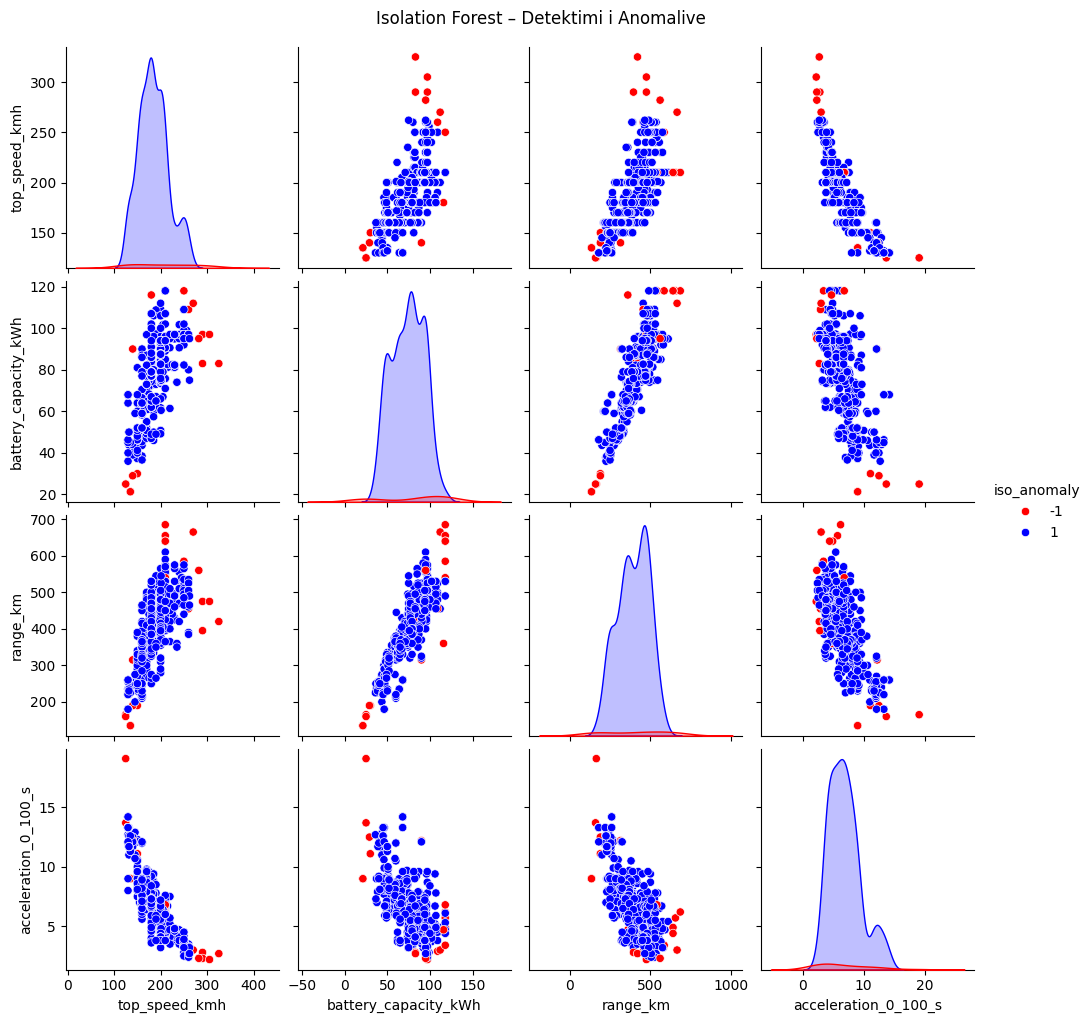

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

outlier_indices = combined_outliers.index
dt_clean = dt.drop(index=outlier_indices)

total_rows = dt.shape[0]
removed_rows = len(outlier_indices)
retained_rows = dt_clean.shape[0]
percentage_removed = (removed_rows / total_rows) * 100

print("\n--- Mënjanimi i zbulimeve jo të sakta ---")
print(f"Totali i rreshtave fillestarë : {total_rows}")
print(f"Rreshta të identifikuar si Outliers (Z-score ∪ IQR): {removed_rows}")
print(f"Rreshta të mbetur (Clean Data): {retained_rows}")
print(f"Përqindja e të dhënave të humbura: {percentage_removed:.2f}%")
dt_clean.to_csv("dataset/electric_vehicles_cleaned.csv", index=False)
print("Dataseti i pastruar u ruajt si electric_vehicles_cleaned.csv")
combined_outliers.to_csv("dataset/z_iqr_removed_outliers.csv", index=False)
print("\nOutliers të ruajtur në dataset/z_iqr_removed_outliers.csv")
print("\n--- PARA HEQJES ---")
print(dt[target_cols].describe().loc[['mean', 'std', 'min', 'max']])

print("\n--- PAS HEQJES ---")
print(dt_clean[target_cols].describe().loc[['mean', 'std', 'min', 'max']])
from sklearn.ensemble import IsolationForest

print("\n=== Isolation Forest: Detektimi i anomalive ===")

iso = IsolationForest(contamination=0.05, random_state=42)
dt["iso_anomaly"] = iso.fit_predict(dt[target_cols])

iso_anomalies = dt[dt["iso_anomaly"] == -1]
iso_normals = dt[dt["iso_anomaly"] == 1]

print("Numri i anomalive (Isolation Forest):", len(iso_anomalies))

sns.pairplot(
    dt[target_cols + ["iso_anomaly"]],
    hue="iso_anomaly",
    palette={1: "blue", -1: "red"},
    diag_kind="kde"
)
plt.suptitle("Isolation Forest – Detektimi i Anomalive", y=1.02)
plt.show()



## Eksplorimi i te dhënave: statistika përmbledhëse, multivariante.


=== Informata bazë ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   brand                       478 non-null    object  
 1   model                       477 non-null    object  
 2   top_speed_kmh               478 non-null    int64   
 3   battery_capacity_kWh        478 non-null    float64 
 4   battery_type                478 non-null    object  
 5   torque_nm                   471 non-null    float64 
 6   efficiency_wh_per_km        478 non-null    int64   
 7   range_km                    478 non-null    int64   
 8   acceleration_0_100_s        478 non-null    float64 
 9   fast_charging_power_kw_dc   477 non-null    float64 
 10  fast_charge_port            477 non-null    object  
 11  towing_capacity_kg          452 non-null    float64 
 12  cargo_volume_l              477 non-null    object  
 

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,estimated_range,range_diff_pct,range_per_kWh,speed_efficiency_ratio,performance_index,charge_rate_kw_per_kWh,eco_score,battery_capacity_binned,range_binned,battery_capacity_binarized,range_binarized
count,478.000000,478.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,477.000000,478.000000,478.000000,478.000000,478.0,478.0
mean,185.487448,74.043724,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,458.987221,18.768247,5.380204,1.167394,33.567841,1.653048,3.074282,2.192469,1.866109,1.0,1.0
std,34.252773,20.331058,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,111.994832,9.728445,0.714469,0.230151,20.539917,0.481704,0.405482,0.992945,0.992034,0.0,0.0
min,125.000000,21.300000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,172.972973,0.078678,3.103448,0.351351,6.544503,0.546875,1.796525,0.000000,0.000000,1.0,1.0
25%,160.000000,60.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,389.610350,11.866723,4.944088,1.077476,19.753086,1.355932,2.846439,2.000000,1.000000,1.0,1.0
50%,180.000000,76.150000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,463.624313,18.939146,5.430472,1.181211,29.008883,1.562500,3.117786,2.000000,2.000000,1.0,1.0
75%,201.000000,90.600000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,536.222928,25.656337,5.905512,1.279549,41.968750,1.796247,3.356873,3.000000,3.000000,1.0,1.0
max,325.000000,118.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,783.216783,45.900204,7.355372,1.888112,138.636364,3.380282,4.230300,4.000000,4.000000,1.0,1.0


<Figure size 1400x1200 with 0 Axes>

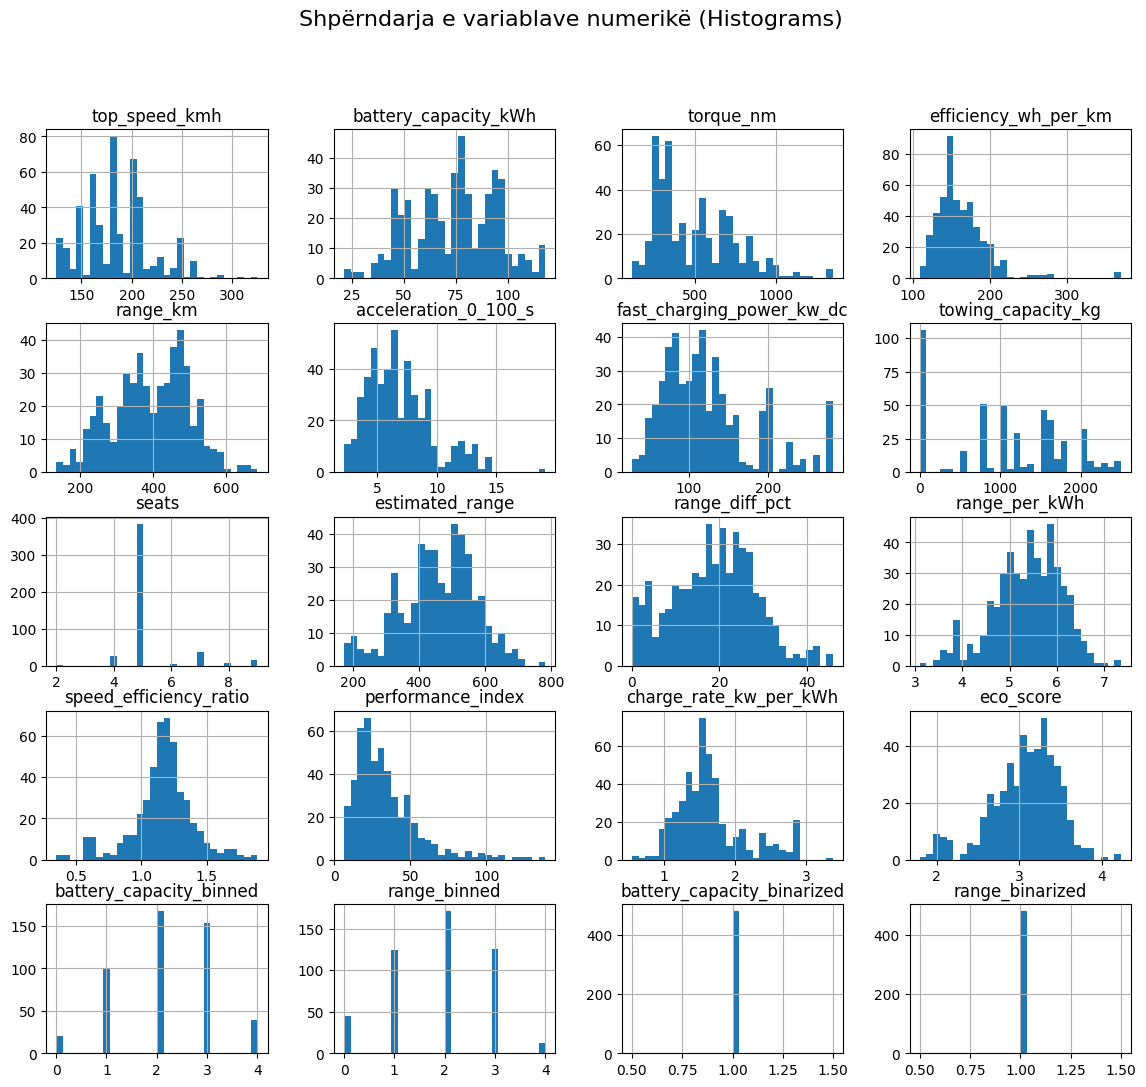

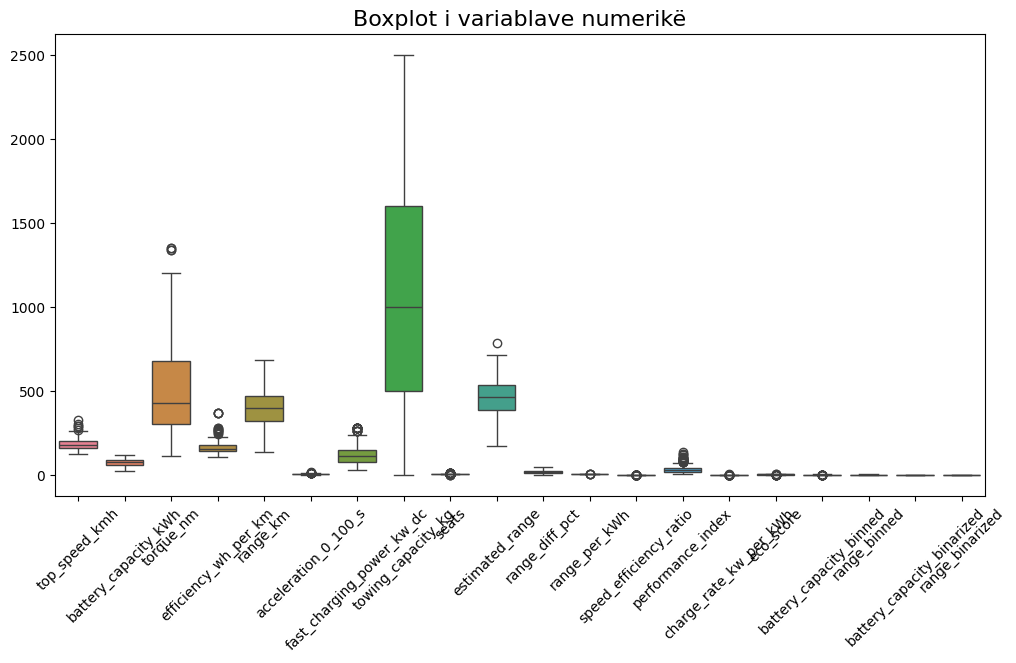


=== Skewness (asimetria e shpërndarjes) ===
top_speed_kmh                 0.645003
battery_capacity_kWh         -0.106333
torque_nm                     0.834466
efficiency_wh_per_km          2.409480
range_km                     -0.155623
acceleration_0_100_s          0.880119
fast_charging_power_kw_dc     1.042050
towing_capacity_kg           -0.095611
seats                         1.999372
estimated_range              -0.255472
range_diff_pct                0.081875
range_per_kWh                -0.447060
speed_efficiency_ratio       -0.458491
performance_index             1.784634
charge_rate_kw_per_kWh        1.035451
eco_score                    -0.658332
battery_capacity_binned      -0.148290
range_binned                 -0.155894
battery_capacity_binarized    0.000000
range_binarized               0.000000
dtype: float64


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_18588\1115238447.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_vals.index, y=skew_vals.values, palette="coolwarm")


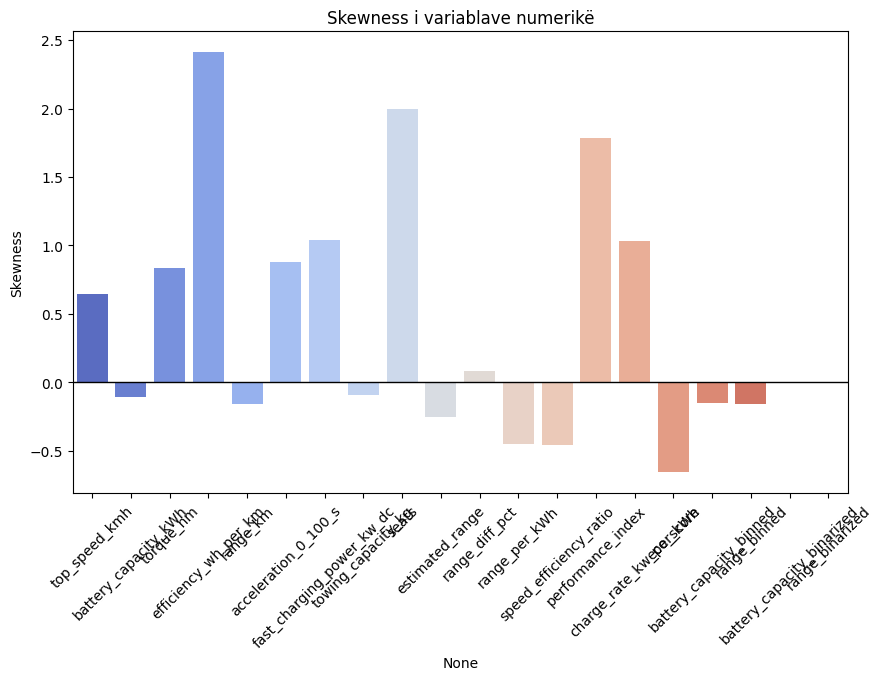


=== Kurtosis (peshat e bishtave të shpërndarjes) ===
top_speed_kmh                  0.529676
battery_capacity_kWh          -0.618342
torque_nm                      0.304018
efficiency_wh_per_km          10.621747
range_km                      -0.486618
acceleration_0_100_s           0.745237
fast_charging_power_kw_dc      0.600633
towing_capacity_kg            -1.105855
seats                          5.494194
estimated_range               -0.172215
range_diff_pct                -0.318373
range_per_kWh                  0.067954
speed_efficiency_ratio         1.726490
performance_index              4.325028
charge_rate_kw_per_kWh         0.901253
eco_score                      0.622194
battery_capacity_binned       -0.520723
range_binned                  -0.667759
battery_capacity_binarized     0.000000
range_binarized                0.000000
dtype: float64


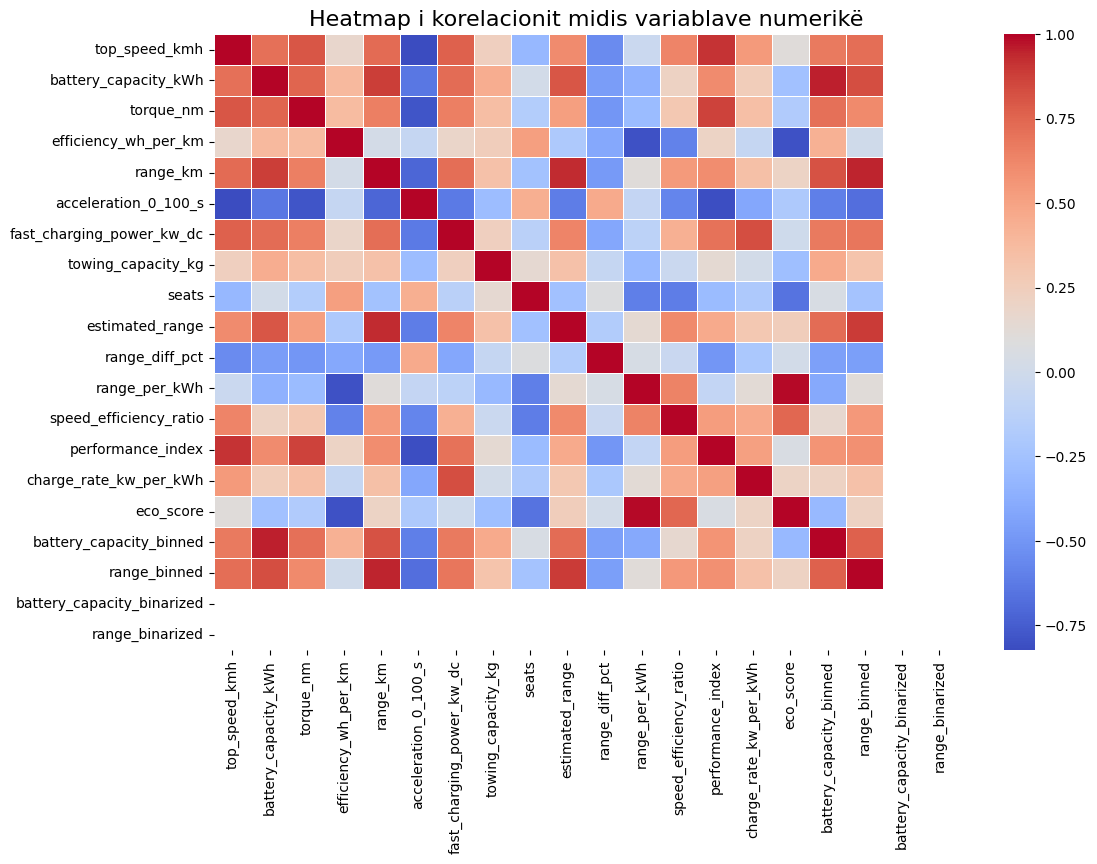

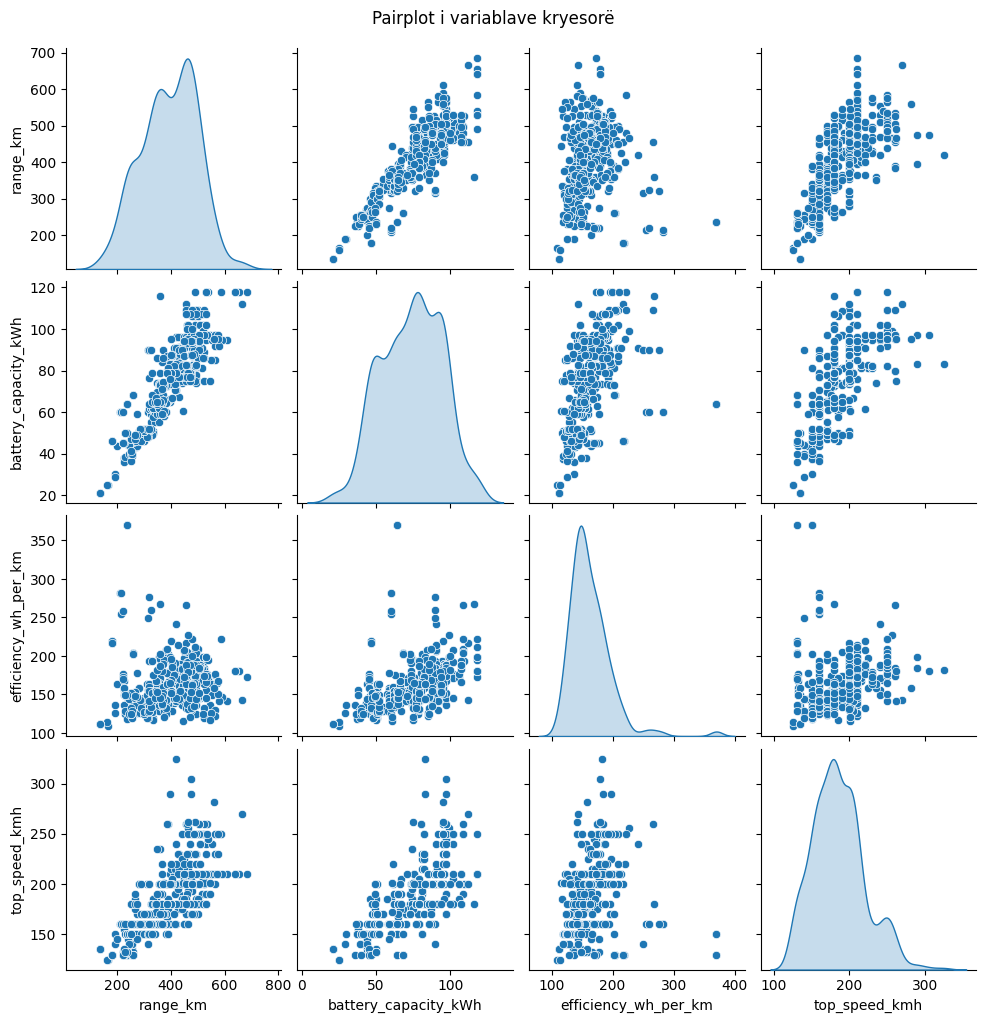

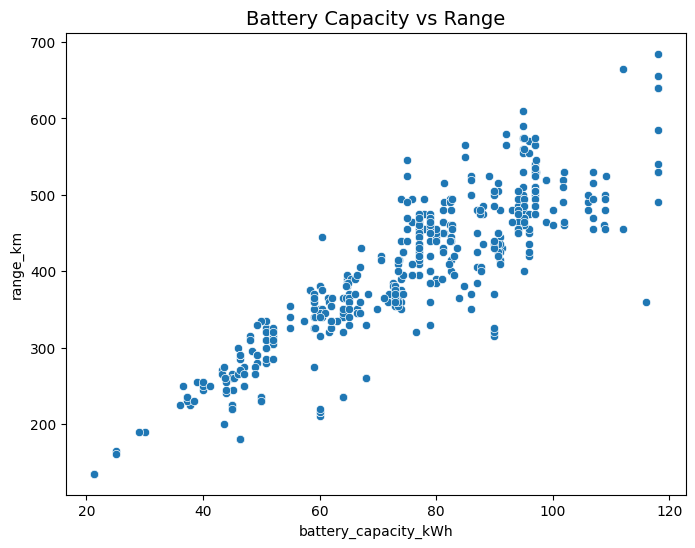

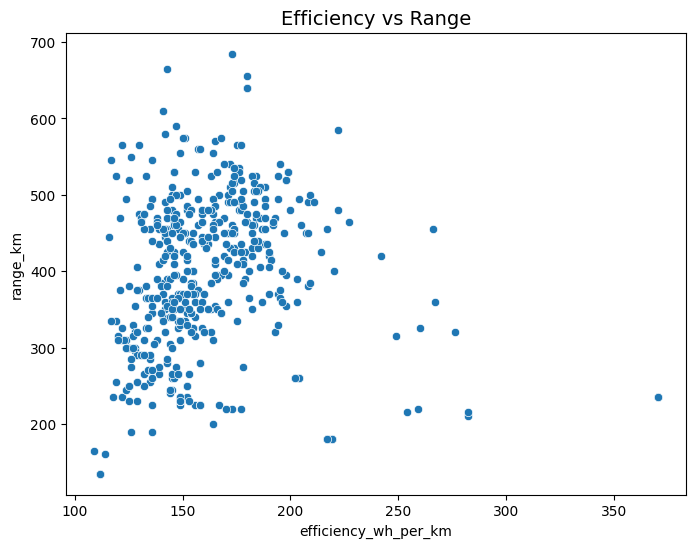

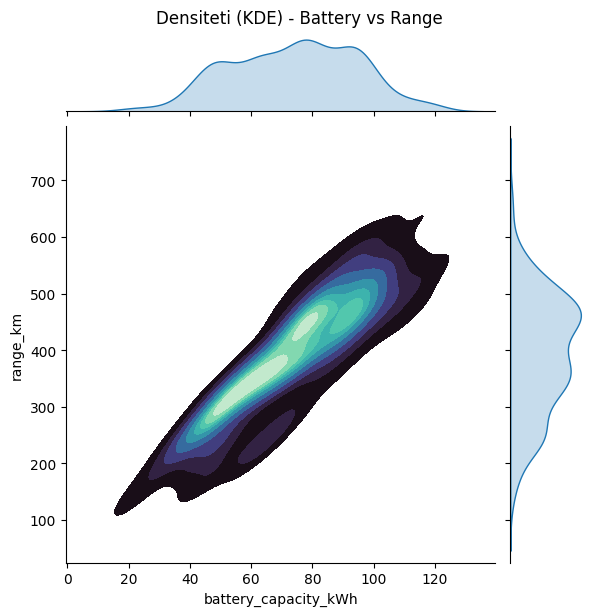

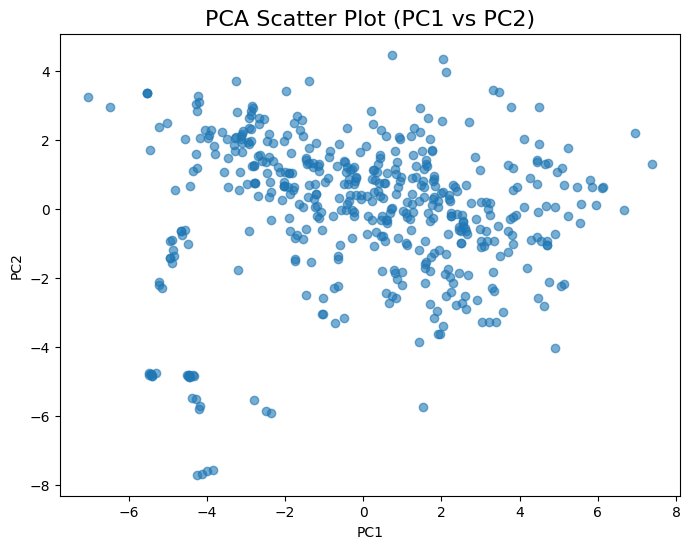


=== Varianca e shpjeguar nga PCA ===
[0.47457442 0.23922062]


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== Informata bazë ===")
print(dt.info())

print("\n=== Statistika numerike përmbledhëse ===")
display(dt.describe())

plt.figure(figsize=(14, 12))
dt.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(14, 12))
plt.suptitle("Shpërndarja e variablave numerikë (Histograms)", fontsize=16)
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=dt.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot i variablave numerikë", fontsize=16)
plt.xticks(rotation=45)
plt.show()

print("\n=== Skewness (asimetria e shpërndarjes) ===")
print(dt.skew(numeric_only=True))
skew_vals = dt.skew(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=skew_vals.index, y=skew_vals.values, palette="coolwarm")
plt.axhline(0, color='black', linewidth=1)
plt.title("Skewness i variablave numerikë")
plt.xticks(rotation=45)
plt.ylabel("Skewness")
plt.show()

print("\n=== Kurtosis (peshat e shpërndarjes) ===")
print(dt.kurt(numeric_only=True))


plt.figure(figsize=(12, 8))
corr = dt.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap i korelacionit midis variablave numerikë", fontsize=16)
plt.show()


selected_cols = ['range_km', 'battery_capacity_kWh', 'efficiency_wh_per_km', 'top_speed_kmh']
sns.pairplot(dt[selected_cols], diag_kind='kde')
plt.suptitle("Pairplot i variablave kryesorë", y=1.02)
plt.show()

# Range vs Battery Capacity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dt, x='battery_capacity_kWh', y='range_km')
plt.title("Battery Capacity vs Range", fontsize=14)
plt.show()

# Range vs Efficiency
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dt, x='efficiency_wh_per_km', y='range_km')
plt.title("Efficiency vs Range", fontsize=14)
plt.show()


sns.jointplot(
    data=dt,
    x='battery_capacity_kWh',
    y='range_km',
    kind='kde',
    fill=True,
    cmap='mako'
)
plt.suptitle("Densiteti (KDE) - Battery vs Range", y=1.02)
plt.show()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_data = dt.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='mean')
num_data_imputed = imputer.fit_transform(num_data)

scaler = StandardScaler()
scaled = scaler.fit_transform(num_data_imputed)

pca = PCA(n_components=2)
pca_vals = pca.fit_transform(scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_vals[:, 0], pca_vals[:, 1], alpha=0.6)
plt.title("PCA Scatter Plot (PC1 vs PC2)", fontsize=16)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("\n=== Varianca e shpjeguar nga PCA ===")
print(pca.explained_variance_ratio_)


# Faza 3